In [1]:
import pandas as pd 
import numpy as np

In [ ]:
pd.read_csv('../../outcome/')

In [22]:
import pandas as pd
import os
import glob

# 获取outcome文件夹下所有的csv文件
csv_files = glob.glob('../../outcome_slippage_com/*.csv')

# 创建一个空的DataFrame来存储所有收益率
all_returns = pd.DataFrame()

# 遍历所有csv文件
for file in csv_files:
    # 从文件名中提取策略名称
    strategy_name = os.path.basename(file).split('_')[2]  # 获取策略名称（如OIY, JJM等）
    
    # 读取csv文件
    df = pd.read_csv(file)
    
    # 只保留date和daily_return列
    returns = df[['date', 'daily_return']]
    
    # 重命名daily_return列为策略名称
    returns = returns.rename(columns={'daily_return': strategy_name})
    
    # 如果是第一个文件，直接赋值
    if all_returns.empty:
        all_returns = returns
    else:
        # 否则，通过date列合并
        all_returns = pd.merge(all_returns, returns, on='date', how='outer')

# 按日期排序
all_returns = all_returns.sort_values('date')

# 将date列设置为索引
all_returns.set_index('date', inplace=True)

# 显示结果
print(all_returns.head())
print("\nShape of the merged returns:", all_returns.shape)

            JJM  APCJ  SMSF  CCS  YP  RBI  OIY  CUBC      RBHC   AM
date                                                               
2017-02-08  NaN   NaN   0.0  0.0 NaN  NaN  NaN   NaN  0.000000  0.0
2017-02-09  NaN   NaN   0.0  0.0 NaN  NaN  NaN   NaN  0.000000  0.0
2017-02-10  NaN   NaN   0.0  0.0 NaN  NaN  NaN   NaN  0.000000  0.0
2017-02-13  NaN   NaN   0.0  0.0 NaN  NaN  NaN   NaN  0.000000  0.0
2017-02-14  NaN   NaN   0.0  0.0 NaN  NaN  NaN   NaN -0.000138  0.0

Shape of the merged returns: (1922, 10)


In [25]:
all_returns['equal_weight_returns'] = equal_weight_returns

# 导出为csv
all_returns.to_csv('all_returns_with_equal_weight_fee.csv')

In [23]:
# ... existing code ...

# 计算等权组合的日收益率（忽略全为NaN的行）
equal_weight_returns = all_returns.mean(axis=1, skipna=True)

# 计算等权组合的累积收益率
cumulative_returns = (1 + equal_weight_returns.fillna(0)).cumprod() - 1

# 显示结果
print("等权组合的累积收益率：")
print(cumulative_returns)

# 如果需要只看最后几天的结果
print("\n最后5天的累积收益率：")
print(cumulative_returns.tail())

# ... existing code ...

等权组合的累积收益率：
date
2017-02-08    0.000000
2017-02-09    0.000000
2017-02-10    0.000000
2017-02-13    0.000000
2017-02-14   -0.000035
                ...   
2024-12-25    0.069445
2024-12-26    0.069344
2024-12-27    0.069628
2024-12-30    0.069685
2024-12-31    0.069569
Length: 1922, dtype: float64

最后5天的累积收益率：
date
2024-12-25    0.069445
2024-12-26    0.069344
2024-12-27    0.069628
2024-12-30    0.069685
2024-12-31    0.069569
dtype: float64


<Axes: title={'center': 'Return'}, xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

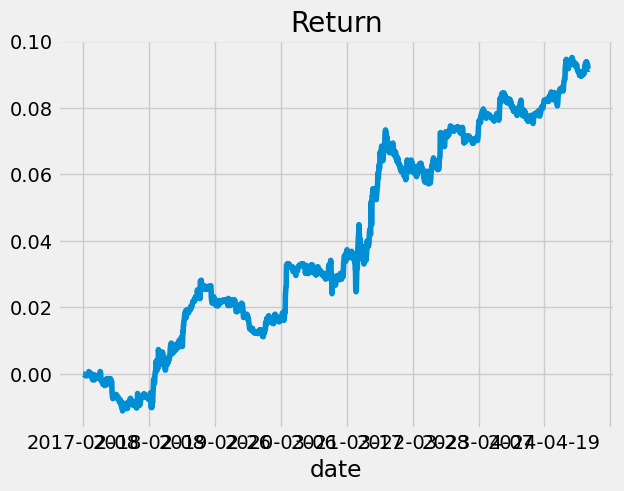

In [20]:
cumulative_returns.plot(title="Return")

In [10]:
# 计算等权组合的日收益率
equal_weight_returns = all_returns.mean(axis=1, skipna=True)


# # 计算等权组合的累积收益率（Series）
# cumulative_returns = (1 + equal_weight_returns.fillna(0)).cumprod() - 1

# # 转为DataFrame，列名为“无杠杆策略”
# cumulative_returns = cumulative_returns.to_frame(name="无杠杆策略")

# 显示结果
print(cumulative_returns.head())

               无杠杆策略
date                
2017-02-08  0.000000
2017-02-09  0.000000
2017-02-10  0.000000
2017-02-13  0.000000
2017-02-14  0.000092


In [5]:
import pandas as pd

import numpy as np

from collections import OrderedDict

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

ANNUAL_FACTOR = {'monthly':12, 
                 'weekly': 52, 
                 'daily': 252}
import pandas as pd
import statsmodels.api as sm
from collections import OrderedDict
from statsmodels.tsa.arima_model import ARMA

ANNUAL_FACTOR = {'monthly':12, 
                 'weekly': 52, 
                 'daily': 252}

class Measure(object):
    
    # -----------description-------------
    @classmethod
    def describe(cls, returns):  
        res = returns.describe()
        res['skew'] = returns.skew()
        res['kurtosis'] = returns.kurtosis()
        res['start'] = returns.index.min().strftime('%Y%m%d')
        res['end'] = returns.index.max().strftime('%Y%m%d')
        return res

    # -----------return related-------------
    @classmethod
    def cal_cagr(cls, returns, period='daily'):
        annual_factor = ANNUAL_FACTOR[period]
        num_years = len(returns) / annual_factor
        cum_ret = (1 + returns).cumprod()
        res = (cum_ret.iloc[-1]) ** (1 / num_years) - 1
        return res
    
    @classmethod    
    def cal_cumret(cls, returns):
        cum_ret = (1 + returns).cumprod()
        res = cum_ret.iloc[-1] - 1
        return res
    
    @classmethod
    def cal_aar(cls, returns, period='daily'):
        annual_factor = ANNUAL_FACTOR[period]
        average_ret = returns.mean()
        res = average_ret * annual_factor
        return res
    
    @classmethod
    def cal_alpha(cls, returns, bm_returns, risk_free=0, period='daily'):
        annual_factor = ANNUAL_FACTOR[period]
        y = returns - risk_free
        x = bm_returns - risk_free
        # need not add constant
        alpha =sm.OLS(y, x).fit().resid
        res = alpha.mean() * annual_factor
        return res
    
    @classmethod
    def cal_max_min_monthly_return(cls, returns, period='daily'):
        if period in ('daily', 'weekly'):
            monthly_return = (1 + returns).cumprod(
                    ).resample('M').last().pct_change()
        elif period == 'monthly':
            monthly_return = returns
        
        res = (monthly_return.max(), monthly_return.min())
        return res
        
    # -----------risk related-------------   
    @classmethod
    def cal_standard_deviation(cls, returns, period='daily'):
        annual_factor = ANNUAL_FACTOR[period]
        res = returns.std() * pd.np.sqrt(annual_factor)
        return res

    @classmethod
    def cal_downside_deviation(cls, returns, mar=0, period='daily'):
        """mar:vMinimum Acceptable Return
        """
        annual_factor = ANNUAL_FACTOR[period]
        returns_adj = returns - mar
        mask = returns_adj > 0
        returns_adj[mask] = 0
        square = returns_adj ** 2
        square_mean = square.sum() / len(square)
        res = pd.np.sqrt(square_mean * annual_factor)
        return res
    
    @classmethod
    def cal_marketbeta(cls, returns, bm_returns, risk_free=0):
        y = returns - risk_free
        x = bm_returns - risk_free
        res = sm.OLS(y, x).fit().params[0]
        return res
    
    @classmethod
    def cal_drawdown(cls, returns):
        cum_ret = (1 + returns).cumprod()
        drawdown = OrderedDict()
        for dt in cum_ret.index:
            drawdown[dt] = (cum_ret.loc[dt] - cum_ret.loc[:dt].max()) / (cum_ret.loc[:dt].max())
        res = pd.Series(drawdown)
        return res

    @classmethod
    def cal_max_drawdown(cls, returns):
        drawdown = cls.cal_drawdown(returns)
        res = drawdown.abs().max()
        return res

    @classmethod
    def cal_var(cls, returns, alpha=0.05):
        """This method calculates the historical simulation var 
        of the returns
        """
        res = abs(returns.quantile(q=alpha))
        return res
    
    # -----------risk&return related-------------   
    @classmethod
    def cal_sharpe(cls, returns, risk_free=0, period='daily'):
        returns_adj = returns - risk_free
        arr = cls.cal_aar(returns_adj, period)
        vol = cls.cal_standard_deviation(returns, period)
        res = arr / vol
        return res
    
    @classmethod
    def cal_sortino(cls, returns, mar=0, risk_free=0, period='daily'):
        returns_adj = returns - risk_free
        arr = cls.cal_aar(returns_adj, period)        
        downside_vol = cls.cal_downside_deviation(returns, mar, period)
        res = arr / downside_vol
        return res
    
    @classmethod    
    def cal_calmar(cls, returns, risk_free=0, period='daily'):
        returns_adj = returns - risk_free
        arr = cls.cal_aar(returns_adj, period)
        md = cls.cal_max_drawdown(returns)
        res = arr / md
        return res

    @classmethod        
    def cal_omega(cls, returns, mar=0):
        returns_adj = returns - mar
        profit = returns_adj[returns_adj > 0].sum()
        loss = returns_adj[returns_adj <= 0].sum()
        res = profit / loss
        return res
    
    @classmethod
    def cal_information(cls, returns, bm_returns, period='daily'):
        excess_ret = returns - bm_returns
        arr = cls.cal_aar(excess_ret, period)
        tracking_error = cls.cal_standard_deviation(excess_ret, period)
        res = arr / tracking_error
        return res

    @classmethod    
    def cal_treynor(cls, returns, bm_returns, risk_free=0, period='daily'):
        returns_adj = returns - risk_free
        arr = cls.cal_aar(returns_adj, period) 
        marketbeta = cls.cal_marketbeta(returns, bm_returns, risk_free)
        res = arr / marketbeta
        return res

    @classmethod        
    def cal_m_square(cls, returns, bm_returns, risk_free=0, period='daily'):
        sharpe = cls.cal_sharpe(returns, risk_free, period)
        bm_vol = cls.cal_standard_deviation(bm_vbm_returns, period='daily')
        res = sharpe * bm_vol + risk_free
        return res

    @classmethod        
    def cal_sterling(cls, returns, risk_free=0, period='daily'):
        returns_adj = returns - risk_free
        arr = cls.cal_aar(returns_adj, period)
        drawdown_mean = cls.cal_drawdown(returns).mean()
        res = arr / drawdown_mean
        return res

    @classmethod    
    def cal_burke(cls, returns, risk_free=0, period='daily'):
        returns_adj = returns - risk_free
        arr = cls.cal_aar(returns_adj, period)
        drawdown = cls.cal_drawdown(returns)
        drawdown_square = drawdown**2
        res = arr / pd.np.sqrt(drawdown_square.mean())
        return res
    
    @classmethod    
    def cal_tail(cls, returns, alpha=0.05):
        profit = abs(returns.quantile(1-alpha))
        loss = abs(returns.quantile(alpha))
        res = profit / loss
        return res
  
    @classmethod    
    def cal_rachev(cls, returns, alpha=0.05):
        profit_tail = abs(returns.quantile(1-alpha))
        profit = returns[returns >= profit_tail]
        
        loss_tail = returns.quantile(alpha)
        loss = returns[returns <= loss_tail]
        
        res = profit.sum() / abs(loss.sum())
        return res

    # -----------Stability&sustainability related-------------   
    @classmethod
    def cal_stability(cls, returns):
        y = pd.np.log((1 + returns).cumprod())
        x = pd.Series(pd.np.arange(len(cum_ret)), index=cum_ret.index)
        x_constant = sm.add_constant(x)
        res = sm.OLS(y, x_constant).fit().rsquared
        return res
    
    @classmethod
    def cal_arma(cls, returns, bm_returns, risk_free=0):
        # calculate excess return
        y = returns - risk_free
        x = bm_returns - risk_free
        alpha =sm.OLS(y, x).fit().resid
        model = ARMA(alpha, order=(1, 1))
        res = model.fit(disp=0, method='css')
        
        return res
    
    @classmethod
    def cal_monthly_odds(cls, returns, period='daily'):
        if period in ('daily', 'weekly'):
            monthly_return = (1 + returns).cumprod(
                    ).resample('M').last().pct_change()
        elif period == 'monthly':
            monthly_return = returns
            
        profit_count = (monthly_return>0).sum()
        loss_count = (monthly_return<=0).sum()
        res = profit_count / (loss_count + profit_count)
        return res
    
    @classmethod
    def cal_func(cls):
        pass
 
    # -----------concentration related------------- 
    
    # -----------concentration related------------- 
    
    

format_percent = lambda x: str(round(x * 100, 2)) + '%'
format_round_normal = lambda x: round(x, 2)

def create_return_risk_metrics(returns, period='daily'):
    returns = returns.dropna()
    annual_return_ = Measure.cal_cagr(returns, period=period)
    annual_volatility_ = Measure.cal_standard_deviation(returns, period=period)
    sharpe_ratio_ = Measure.cal_sharpe(returns, period=period)
    max_drawdown_ = Measure.cal_max_drawdown(returns)
    omega_ratio_ = Measure.cal_omega(returns)
    calmar_ratio_ = Measure.cal_calmar(returns, period=period)
    sortino_ratio_ = Measure.cal_sortino(returns, period=period)
    res = pd.Series({'annual_return': format_percent(annual_return_), 
                     'annual_volatility': format_percent(annual_volatility_), 
                     'sharpe_ratio': format_round_normal(sharpe_ratio_), 
                     'max_drawdown': format_percent(max_drawdown_), 
                     'omega_ratio': format_round_normal(omega_ratio_), 
                     'calmar_ratio': format_round_normal(calmar_ratio_), 
                     'sortino_ratio': format_round_normal(sortino_ratio_)})
    return res

In [6]:
class BacktestPlus(object):

    def __init__(self, returns, portfolio, cost=0):
        self.returns = returns
        self.portfolio = portfolio
        self.cost = cost
        self.account = {}
 
    def run(self):
        cost = self.cost
        ret = self.returns
        cumret = (1 + ret).cumprod()
        portfolio = self.portfolio
        calendar = ret.index.sort_values()
        
        wealth = 1
        holding = pd.Series()
        equity = pd.Series()
        position = pd.Series()
        
        wealth_dict = OrderedDict()  # account net asset value
        holding_dict = OrderedDict() # holding volume of each asset
        equity_dict = OrderedDict()  # equity value of each asset
        position_dict = OrderedDict()# position ratio of each asset
        turnover_dict = OrderedDict()
        leverage_dict = OrderedDict() # leverage
        cost_ratio_dict = OrderedDict()
        
        # 负债项，用于处理杠杆
        liabilities = 0
        
        for i, dt in enumerate(calendar):
            p = cumret.loc[dt]
            target = portfolio.get(dt)

            # none rebalance date
            if (not holding.empty) and (target is None):
                equity = holding * p
                position = equity / equity.sum() 
                wealth = equity.sum() - liabilities

                #wealth_dict[dt] = wealth
                holding_dict[dt] = holding
                equity_dict[dt] = equity
                position_dict[dt] = position
            
            # rebalance date
            if target is not None:
                # before rebalance
                equity = holding * p
                if not holding.empty:
                    wealth = equity.sum() - liabilities 
                position = equity / equity.sum()
                
                #wealth_dict[dt] = wealth
                holding_dict[dt] = holding
                equity_dict[dt] = equity
                position_dict[dt] = position
                
                # turnover(one way)
                diff = target.sub(position, fill_value=0)
                turnover = abs(diff).sum() * 0.5
                turnover_dict[dt] = turnover

                # commission fee and slippage
                total_cost = wealth * turnover * 2 * cost
                cost_ratio_dict[dt] = total_cost / wealth
                
                holding = (wealth - total_cost) * target / p      
                liabilities = (holding * p).sum() - wealth

            wealth_dict[dt] = wealth
            leverage_dict[dt] = equity.sum() / wealth # 调仓日当天的杠杆还是旧杠杆
                                
        self.account['wealth'] = wealth_dict
        self.account['holding'] = holding_dict
        self.account['equity'] = equity_dict
        self.account['position'] = position_dict
        self.account['turnover'] = turnover_dict
        self.account['leverage'] = leverage_dict
        self.account['cost_ratio'] = cost_ratio_dict
 
        nav = pd.Series(wealth_dict)
        
        return nav

In [ ]:
CAL = [pd.to_datetime(dt) for dt in rb_ret.index]     #这里假设每天rebalance
rb_ret['RB-20%目标波动'], lev1 = cal_lev_ret(rb_ret['RB无杠杆策略'],review=21, target_vol=0.2)   

#按照过去21天的年化波动率每天调整杠杆让波动率到20%


(1 + rb_ret['RB-20%目标波动']).cumprod().plot(figsize=(18, 6))
rb_ret.apply(create_return_risk_metrics)